<font size="3">RFM stands for Recency - Frequency - Monetary Value<br>
<br><br>
Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.<br>
Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.<br>
High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.<br></font>

In [1]:
import pandas as pd

df = pd.read_csv("../Data/OnlineRetail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [3]:
df_uk = df[df['Country'] == 'United Kingdom']
df_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df_user = pd.DataFrame(df_uk['CustomerID'].unique())
df_user.columns = ['CustomerID']
df_user.head()

,CustomerID
0,17850.0
1,13047.0
2,13748.0
3,15100.0
4,15291.0


In [5]:
df_max_purchase = df_uk.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_max_purchase.rename(columns={"InvoiceDate": "MaxPurchaseDate"}, inplace=True)
df_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [6]:
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days
df_max_purchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [7]:
df_user = df_user.merge(df_max_purchase, on='CustomerID')
df_user.head()

,CustomerID,MaxPurchaseDate,Recency
0,17850.0,2011-02-10 14:38:00,301
1,13047.0,2011-11-08 12:10:00,31
2,13748.0,2011-09-05 09:45:00,95
3,15100.0,2011-01-13 17:09:00,329
4,15291.0,2011-11-14 11:02:00,25


In [8]:
import matplotlib.pyplot as plt

df_user['Recency'].value_counts().to_frame().plot.hist(bins=50, figsize=(14, 6))
plt.show()

<Figure size 1400x600 with 1 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

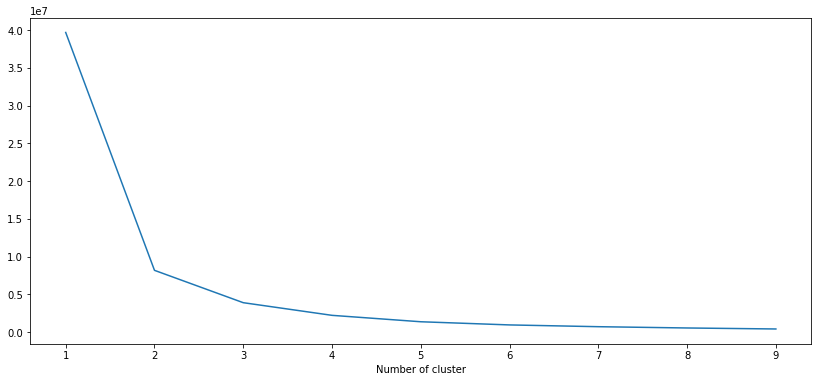

In [9]:
from sklearn.cluster import KMeans

inertias = {}
df_recency = df_user[['Recency']]

for k in range(1, 10):
    k_means = KMeans(n_clusters=k).fit(df_recency)
    df_recency["clusters"] = k_means.labels_
    inertias[k] = k_means.inertia_ 

plt.figure(figsize=(14, 6))
plt.plot(list(inertias.keys()), list(inertias.values()))
plt.xlabel("Number of cluster")
plt.show()

In [10]:
k_means = KMeans(n_clusters=4)
k_means.fit(df_recency)

df_user['RecencyCluster'] = k_means.predict(df_recency)
df_user.head()

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster
0,17850.0,2011-02-10 14:38:00,301,1
1,13047.0,2011-11-08 12:10:00,31,0
2,13748.0,2011-09-05 09:45:00,95,3
3,15100.0,2011-01-13 17:09:00,329,1
4,15291.0,2011-11-14 11:02:00,25,0


In [11]:
df_user.groupby('RecencyCluster').describe()['Recency']

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,1950.0,17.488205,13.237058,0.0,6.00,16.0,28.00,47.0
1,478.0,304.393305,41.183489,245.0,266.25,300.0,336.00,373.0
2,568.0,184.625000,31.753602,132.0,156.75,184.0,211.25,244.0
3,954.0,77.679245,22.850898,48.0,59.00,72.5,93.00,131.0


In [12]:
df_user['RecencyCluster'] = df_user['RecencyCluster'].apply(
    lambda x: "Good" if x == 0 else ("Bad" if x == 1 else ("Worst" if x == 2 else "Best")))
df_user.head(2)

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster
0,17850.0,2011-02-10 14:38:00,301,Bad
1,13047.0,2011-11-08 12:10:00,31,Good


In [13]:
df_user['RecencyCluster'] = df_user['RecencyCluster'].apply(
    lambda x: 2 if x == "Good" else (1 if x == "Bad" else (0 if x == "Worst" else 3)))
df_user.head(2)

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster
0,17850.0,2011-02-10 14:38:00,301,1
1,13047.0,2011-11-08 12:10:00,31,2


In [14]:
df_frequency = df_uk.groupby('CustomerID')['InvoiceDate'].count().reset_index()
df_frequency.columns = ['CustomerID', 'Frequency']
df_user = df_user.merge(df_frequency, on='CustomerID')
df_user.head()

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster,Frequency
0,17850.0,2011-02-10 14:38:00,301,1,312
1,13047.0,2011-11-08 12:10:00,31,2,196
2,13748.0,2011-09-05 09:45:00,95,3,28
3,15100.0,2011-01-13 17:09:00,329,1,6
4,15291.0,2011-11-14 11:02:00,25,2,109


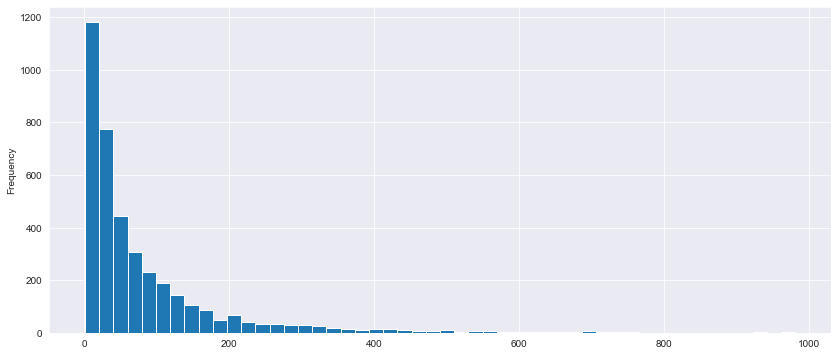

In [15]:
import seaborn as sns

sns.set_style('darkgrid')
df_user[df_user['Frequency'] < 1000]['Frequency'].plot.hist(bins=50, figsize=(14, 6))
plt.show()

In [16]:
k_means.fit(df_user[['Frequency']])
df_user['FrequencyCluster'] = k_means.predict(df_user[['Frequency']])
df_user.head()

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,2011-02-10 14:38:00,301,1,312,3
1,13047.0,2011-11-08 12:10:00,31,2,196,3
2,13748.0,2011-09-05 09:45:00,95,3,28,0
3,15100.0,2011-01-13 17:09:00,329,1,6,0
4,15291.0,2011-11-14 11:02:00,25,2,109,0


In [17]:
df_user.groupby('FrequencyCluster').describe()['Frequency']

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3496.0,49.525744,44.954212,1.0,15.0,33.0,73.0,190.0
1,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
2,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0
3,429.0,331.221445,133.856510,191.0,228.0,287.0,399.0,803.0


In [18]:
df_user['FrequencyCluster'] = df_user['FrequencyCluster'].apply(
    lambda x: "Good" if x == 2 else ("Bad" if x == 3 else ("Worst" if x == 0 else "Best")))

df_user['FrequencyCluster'] = df_user['FrequencyCluster'].apply(
    lambda x: 2 if x == "Good" else (1 if x == "Bad" else (0 if x == "Worst" else 3)))
df_user.head(2)

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,2011-02-10 14:38:00,301,1,312,1
1,13047.0,2011-11-08 12:10:00,31,2,196,1


In [19]:
df_uk['Revenue'] = df_uk['UnitPrice'] * df_uk['Quantity']
df_revenue = df_uk.groupby('CustomerID')['Revenue'].sum().reset_index()
df_user = df_user.merge(df_revenue, on='CustomerID')
df_user.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CustomerID,MaxPurchaseDate,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,17850.0,2011-02-10 14:38:00,301,1,312,1,5288.63
1,13047.0,2011-11-08 12:10:00,31,2,196,1,3079.10
2,13748.0,2011-09-05 09:45:00,95,3,28,0,948.25
3,15100.0,2011-01-13 17:09:00,329,1,6,0,635.10
4,15291.0,2011-11-14 11:02:00,25,2,109,0,4596.51


In [20]:
k_means.fit(df_user[['Revenue']])
df_user['RevenueCluster'] = k_means.predict(df_user[['Revenue']])
df_user.head()

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,2011-02-10 14:38:00,301,1,312,1,5288.63,0
1,13047.0,2011-11-08 12:10:00,31,2,196,1,3079.10,3
2,13748.0,2011-09-05 09:45:00,95,3,28,0,948.25,3
3,15100.0,2011-01-13 17:09:00,329,1,6,0,635.10,3
4,15291.0,2011-11-14 11:02:00,25,2,109,0,4596.51,0


In [21]:
df_user.groupby('RevenueCluster').describe()['Revenue']

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,234.0,7760.699530,3637.173671,4330.67,5161.485,6549.38,9142.305,21535.90
1,2.0,221960.330000,48759.481478,187482.17,204721.250,221960.33,239199.410,256438.49
2,27.0,43070.445185,15939.249588,25748.35,28865.490,36351.42,53489.790,88125.38
3,3687.0,907.254414,921.910820,-4287.63,263.115,572.56,1258.220,4314.72


In [22]:
df_user['RevenueCluster'] = df_user['RevenueCluster'].apply(
    lambda x: "Good" if x == 2 else ("Bad" if x == 3 else ("Worst" if x == 0 else "Best")))

df_user['RevenueCluster'] = df_user['RevenueCluster'].apply(
    lambda x: 2 if x == "Good" else (1 if x == "Bad" else (0 if x == "Worst" else 3)))
df_user.head(2)

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,2011-02-10 14:38:00,301,1,312,1,5288.63,0
1,13047.0,2011-11-08 12:10:00,31,2,196,1,3079.10,1


In [23]:
df_user['OverallScore'] = df_user['RecencyCluster'] + df_user['FrequencyCluster'] + df_user['RevenueCluster']
df_user.groupby('OverallScore')['Recency', 'Frequency', 'Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,183.666667,41.666667,11430.843333
1,185.149733,32.279857,492.335884
2,270.321033,36.123616,1164.594262
3,18.917901,91.664815,1649.453729
4,64.529463,100.225303,1395.126700
5,43.051724,539.448276,11770.083621
6,3.428571,2927.857143,82522.388571
7,1.200000,1625.000000,56751.504000


In [24]:
df_user['Segment'] = 'Low-Value'
df_user.loc[df_user['OverallScore'] > 2, 'Segment'] = 'Mid-Value' 
df_user.loc[df_user['OverallScore'] > 4, 'Segment'] = 'High-Value' 
df_user.head()

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,17850.0,2011-02-10 14:38:00,301,1,312,1,5288.63,0,2,Low-Value
1,13047.0,2011-11-08 12:10:00,31,2,196,1,3079.10,1,4,Mid-Value
2,13748.0,2011-09-05 09:45:00,95,3,28,0,948.25,1,4,Mid-Value
3,15100.0,2011-01-13 17:09:00,329,1,6,0,635.10,1,2,Low-Value
4,15291.0,2011-11-14 11:02:00,25,2,109,0,4596.51,0,2,Low-Value


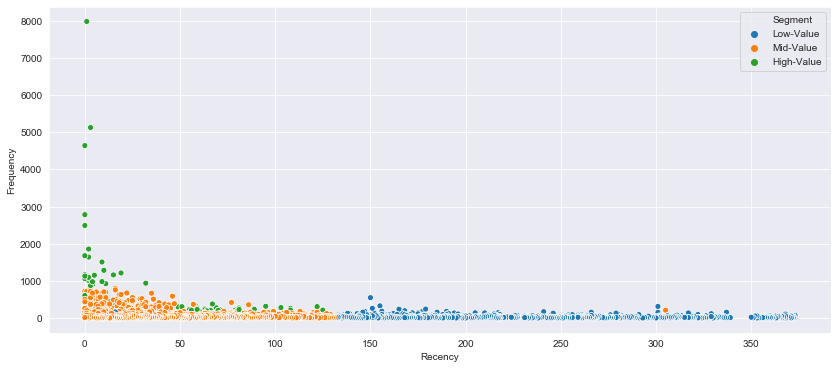

In [26]:
plt.figure(figsize=(14, 6))
sns.scatterplot('Recency', 'Frequency', data=df_user, hue='Segment')
plt.show()

<font size="3">High Value: Improve Retention<br>
Mid Value: Improve Retention + Increase Frequency<br>
Low Value: Increase Frequency</font>